# Email Spam Classifier
- Task1 :  Finding top 30 spam words for better model performance and interpretation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding = 'latin -1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

### Steps by step process :  

1) Data Cleaning
2) EDA
3) Text Preprocessing
4) Model Building
5) Model Evaluation
6) Model Improvement
7) Website creation
8) Deployment

# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
# we will drop most number of null value columns

df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Renaming column names
df.rename(columns={'v1' : 'target', 'v2' : 'text'}, inplace=True)
df.sample(5)

,target,text
974,ham,Eh u send wrongly lar...
5235,ham,Am on the uworld site. Am i buying the qbank o...
1168,ham,Ok . . now i am in bus. . If i come soon i wil...
4937,ham,No it was cancelled yeah baby! Well that sound...
3040,ham,Aight what time you want me to come up?


In [8]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [9]:
# we will change the target value 'ham' -> 'Not spam'

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

df.head(5)

# 0 -> Not spam
# 1 -> spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# checking for missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# checking for duplicated values

print('duplicated_values : ', df.duplicated().sum())

# remove duplicates
df = df.drop_duplicates(keep='first')

duplicated_values :  403


# Exploratory Data Analysis

In [12]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

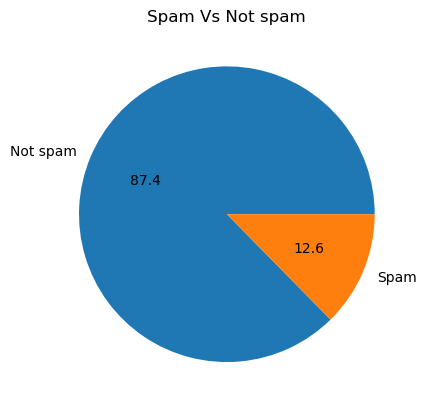

In [25]:
plt.pie(df['target'].value_counts(), labels = ['Not spam', 'Spam'], autopct="%0.1f")
plt.title('Spam Vs Not spam', color='black')
plt.show()


# 88% of text are spam, and 12% are spam
# we consider this as IMBALANCED DATASET

In [27]:
# natural language tool kit
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shaikfirdose/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### For Deeper analysis, we will create few more columns which contains
- number of characters in a text
- number of words in a text
- number of sentences in a text

In [30]:
# number of characters in a text

df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [38]:
# number of words in a text
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [42]:
# number of sentences in a text

df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [43]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [47]:
# lets check distribution of data for Not Spam messages 

df[df['target'] == 0][['num_characters','num_words', 'num_sentences' ]].describe()

# by seeing this the non spam messages are shorter

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [50]:
# lets check distribution of data for Not Spam messages 

df[df['target'] == 1][['num_characters','num_words', 'num_sentences' ]].describe()

# The spam messages are longer 

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Text(0, 0.5, 'count of Characters')

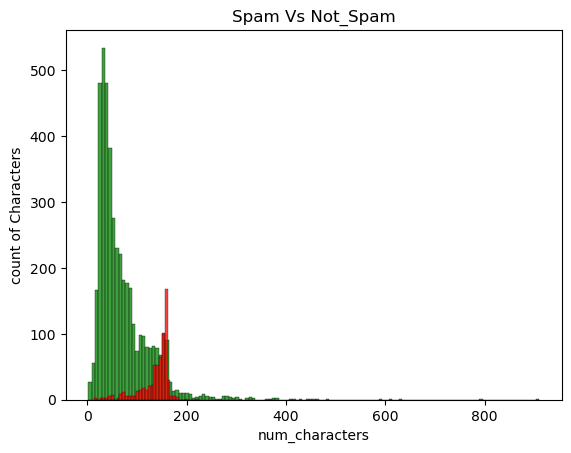

In [64]:
# lets plot and see how num_characters vary in spam and not spam messages

sns.histplot(df[df['target'] == 0]['num_characters'], color = 'green')
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')
plt.title('Spam Vs Not_Spam')
plt.ylabel('count of Characters')

Text(0, 0.5, 'count of words')

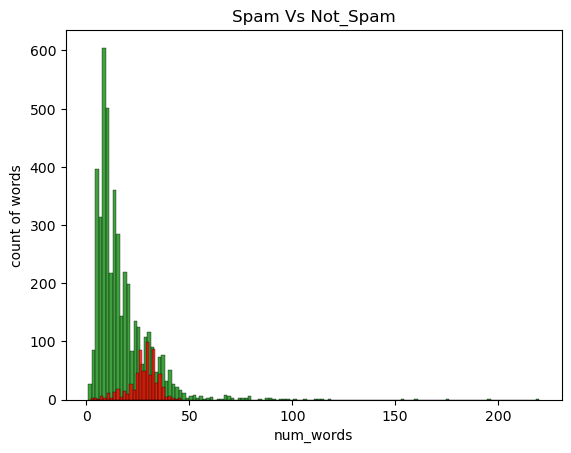

In [65]:
# lets plot and see how num_words vary in spam and not spam messages

sns.histplot(df[df['target'] == 0]['num_words'], color = 'green')
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')
plt.title('Spam Vs Not_Spam')
plt.ylabel('count of words')

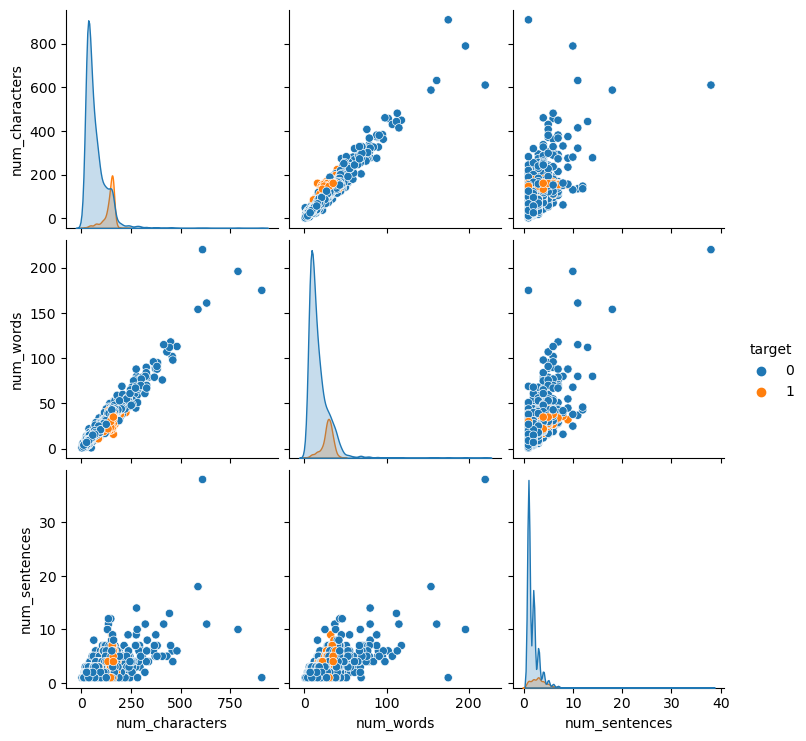

In [67]:
sns.pairplot(df, hue='target')

# we can see there are outliers in the dataset, which needs to be removed

/var/folders/fn/wz542gys40z4t4dnd28rwlkc0000gn/T/ipykernel_53254/2043583344.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

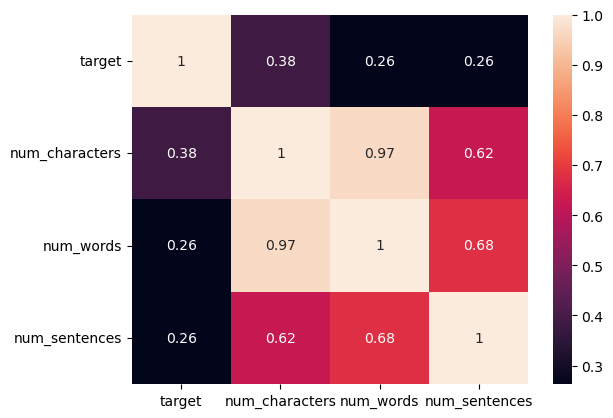

In [74]:
# lets see the correlation b/w features using heatmap

sns.heatmap(df.corr(), annot=True)

# sicne there is high correlation which is a case of multicollinearity, we need to use only ne featue among 3, and
# we can use 'num_characters' for our model, since its correaltion with 'target' variable is high

# 3) Data Preprocesing / Text Preprocessing
- Lower Case
- Tokenization
- Removing Special Characters
- Removing Stop words and punctuation
- Stemming

In [109]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

import string

def transform_text(text):
    
    # lowering the characters
    text = text.lower()
    
    
    # sparating words
    text = nltk.word_tokenize(text)
    
    
    # removing special charcters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    
    # removing stopwords and punctuations in text
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]  # cloning as list is mutuable data type
    y.clear()
    
    
    for i in text:
        y.append(ps.stem(i))
     
    # returning as a string rather words
    return " ".join(y)

In [110]:
transform_text('Hi recruiter did you like my presentation of my project? %% ')

'hi recruit like present project'

In [112]:
# adding transformed text to our original data

df["transformed_text"] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Lets create a word cloud for both spam and not spam messages 

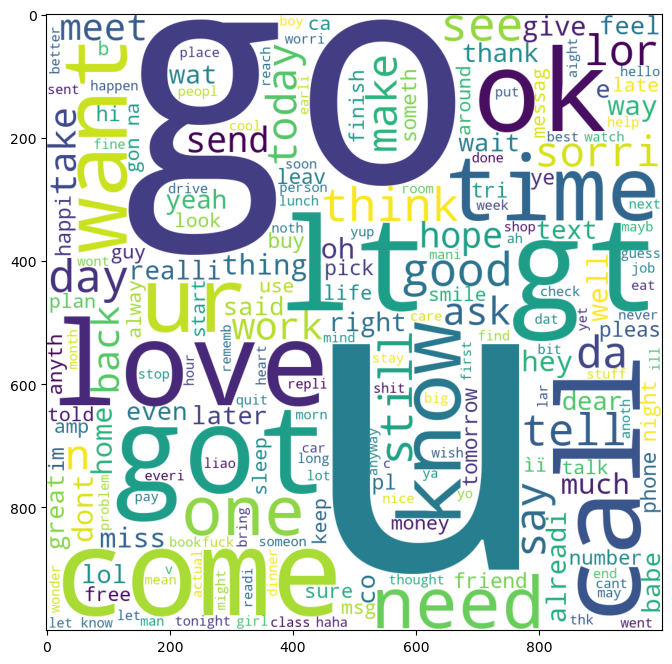

In [126]:
# word count for Not spam messages
from wordcloud import WordCloud
wc = WordCloud(width=1000, height=1000, min_font_size=15, background_color='white')

not_spam_wc = wc.generate(df[df['target']== 0 ]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(10, 8))
plt.imshow(not_spam_wc)

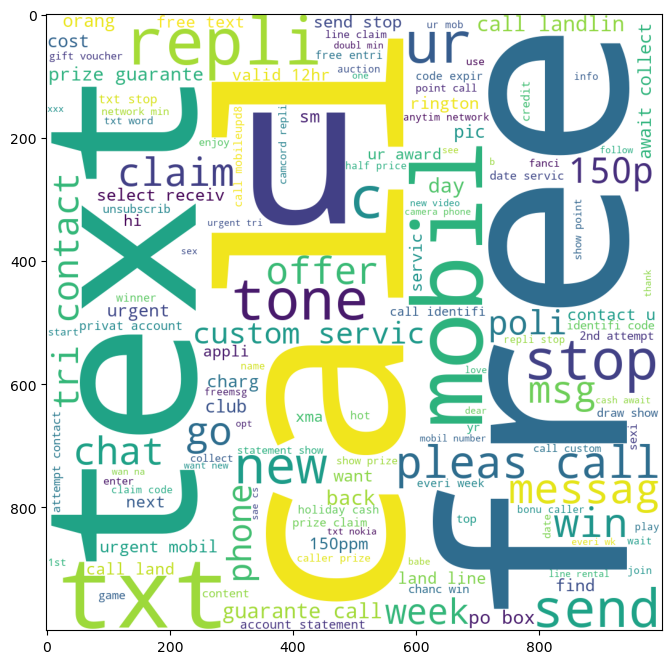

In [127]:
# wordcloud for spam messages
spam_wc = wc.generate(df[df['target']== 1 ]['transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(10, 8))
plt.imshow(spam_wc)

### Lets see top 30 spam words in our data

In [138]:
spam_corpus = []

for msg in df[df['target']== 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [139]:
len(spam_corpus)

9939

In [141]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

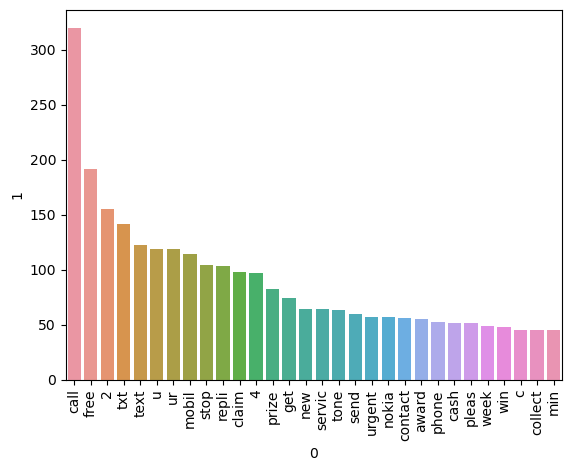

In [151]:
# lets plot and see top 30 spam words

sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Lets see top 30 spam words in our data

In [156]:
not_spam_corpus = []

for msg in df[df['target']== 0]['transformed_text'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

In [157]:
len(not_spam_corpus)

35404

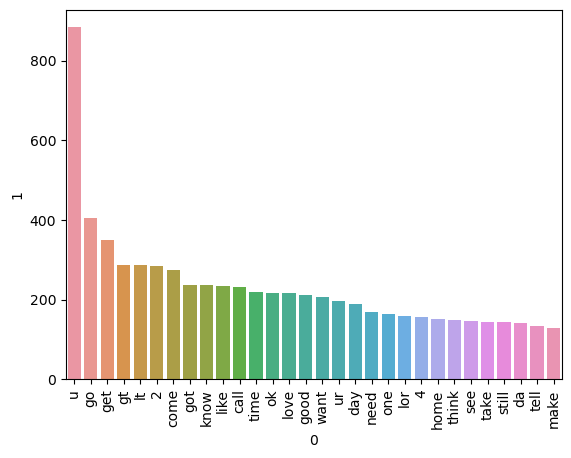

In [161]:
# lets plot and see top 30 not spam words

sns.barplot(x = pd.DataFrame(Counter(not_spam_corpus).most_common(30))[0], y = pd.DataFrame(Counter(not_spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4) Model Building
- Lets apply Machine Learning algos for our model
- As we know Naive Bayes is best suitable for Textual Data

In [163]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Lets convert the textual data to numercial/vector  using CountVectorizer

In [168]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x = cv.fit_transform(df['transformed_text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [173]:
print(x.shape)

(5169, 6708)


In [179]:
y = df['target'].values
y.shape

(5169,)

In [180]:
from sklearn.model_selection import train_test_split

X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)
X_train.shape, x_test.shape, y_train.shape, y_test.shape

((4135, 6708), (1034, 6708), (4135,), (1034,))

## Key Metric : As Data is Imbalanced we will consider 'precision_score' and 'confusion matrix' of which evey Naiye Bayes is good

In [184]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(x_test)
print('GaussianNB')
print('accuracy_score :', accuracy_score(y_test, y_pred1))
print('confusion_matrix :', confusion_matrix(y_test, y_pred1))
print('precision_score :',precision_score(y_test, y_pred1))
print('-------------------------------------------------')

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(x_test)
print('MultinomialNB')
print('accuracy_score :', accuracy_score(y_test, y_pred2))
print('confusion_matrix :', confusion_matrix(y_test, y_pred2))
print('precision_score :',precision_score(y_test, y_pred2))
print('-------------------------------------------------')

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(x_test)
print('MultinomialNB')
print('accuracy_score :', accuracy_score(y_test, y_pred3))
print('confusion_matrix :', confusion_matrix(y_test, y_pred3))
print('precision_score :',precision_score(y_test, y_pred3))

GaussianNB
accuracy_score : 0.8636363636363636
confusion_matrix : [[782 116]
 [ 25 111]]
precision_score : 0.4889867841409692
-------------------------------------------------
MultinomialNB
accuracy_score : 0.9700193423597679
confusion_matrix : [[881  17]
 [ 14 122]]
precision_score : 0.8776978417266187
-------------------------------------------------
MultinomialNB
accuracy_score : 0.9729206963249516
confusion_matrix : [[897   1]
 [ 27 109]]
precision_score : 0.990909090909091


### Lets convert the textual data to numercial/vector using tfidfVectorizer

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(df['transformed_text']).toarray()
x_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [187]:
print(x_tfidf.shape)

(5169, 6708)


In [189]:
y_tfidf = df['target'].values
y_tfidf.shape

(5169,)

In [191]:
X_train_tfidf, x_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(x_tfidf, y_tfidf, test_size=0.2, random_state=41)
X_train_tfidf.shape, x_test_tfidf.shape, y_train_tfidf.shape, y_test_tfidf.shape

((4135, 6708), (1034, 6708), (4135,), (1034,))

In [192]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train_tfidf, y_train_tfidf)
y_pred1 = gnb.predict(x_test_tfidf)
print('GaussianNB')
print('accuracy_score :', accuracy_score(y_test_tfidf, y_pred1))
print('confusion_matrix :', confusion_matrix(y_test_tfidf, y_pred1))
print('precision_score :',precision_score(y_test_tfidf, y_pred1))
print('-------------------------------------------------')

mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(x_test)
print('MultinomialNB')
print('accuracy_score :', accuracy_score(y_test_tfidf, y_pred2))
print('confusion_matrix :', confusion_matrix(y_test_tfidf, y_pred2))
print('precision_score :',precision_score(y_test_tfidf, y_pred2))
print('-------------------------------------------------')

bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(x_test)
print('MultinomialNB')
print('accuracy_score :', accuracy_score(y_test_tfidf, y_pred3))
print('confusion_matrix :', confusion_matrix(y_test_tfidf, y_pred3))
print('precision_score :',precision_score(y_test_tfidf, y_pred3))

GaussianNB
accuracy_score : 0.8588007736943907
confusion_matrix : [[783 115]
 [ 31 105]]
precision_score : 0.4772727272727273
-------------------------------------------------
MultinomialNB
accuracy_score : 0.9555125725338491
confusion_matrix : [[898   0]
 [ 46  90]]
precision_score : 1.0
-------------------------------------------------
MultinomialNB
accuracy_score : 0.9729206963249516
confusion_matrix : [[897   1]
 [ 27 109]]
precision_score : 0.990909090909091


### Lets import all classification algorithams and test out model

In [196]:
# importing all classfifier algorithams in ML

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [198]:
# lets create objects of our classifier

svc = SVC(kernel='sigmoid', gamma = 0.1)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=42)
bc = BaggingClassifier(n_estimators=50, random_state=42)
etc = ExtraTreesClassifier(n_estimators=50, random_state=42)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgb = XGBClassifier(n_estimators = 50, random_state=42)

In [199]:
# lets create a dictionary of our algos

clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [207]:
# lets create a function to train our models and calculate performance

def train_classifier(clf, X_train, y_train, x_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [210]:
accuracy_, precision_ = train_classifier(mnb, X_train_tfidf, y_train_tfidf, x_test_tfidf, y_test_tfidf)
accuracy_, precision_

(0.9555125725338491, 1.0)

In [215]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train_tfidf, y_train_tfidf, x_test_tfidf, y_test_tfidf)
    
    print("For ", name)
    print('accuracy - ', current_accuracy)
    print('Precison - ', current_precision)
    print('--------------------------------')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
accuracy -  0.9187620889748549
Precison -  0.9642857142857143
--------------------------------
For  KN
accuracy -  0.8994197292069632
Precison -  1.0
--------------------------------
For  NB
accuracy -  0.9555125725338491
Precison -  1.0
--------------------------------
For  DT
accuracy -  0.9352030947775629
Precison -  0.8556701030927835
--------------------------------
For  LR
accuracy -  0.9497098646034816
Precison -  0.8962264150943396
--------------------------------
For  RF
accuracy -  0.9671179883945842
Precison -  0.9903846153846154
--------------------------------
For  AdaBoost
accuracy -  0.960348162475822
Precison -  0.8991596638655462
--------------------------------
For  BgC
accuracy -  0.965183752417795
Precison -  0.890625
--------------------------------
For  ETC
accuracy -  0.9709864603481625
Precison -  0.9818181818181818
--------------------------------
For  GBDT
accuracy -  0.9564796905222437
Precison -  0.9504950495049505
--------------------------------
F

In [216]:
clfs.keys()

dict_keys(['SVC', 'KN', 'NB', 'DT', 'LR', 'RF', 'AdaBoost', 'BgC', 'ETC', 'GBDT', 'xgb'])

In [224]:
df_performance = pd.DataFrame({'Algoritham' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending=False)
df_performance

,Algoritham,Accuracy,Precision
1,KN,0.899420,1.000000
2,NB,0.955513,1.000000
5,RF,0.967118,0.990385
8,ETC,0.970986,0.981818
0,SVC,0.918762,0.964286
10,xgb,0.972921,0.957627
9,GBDT,0.956480,0.950495
6,AdaBoost,0.960348,0.899160
4,LR,0.949710,0.896226
7,BgC,0.965184,0.890625


##### Upon running all algorithams we can see few algos like 
- NavieBayes
- RandomForest
- ETC 
##### are performing better

In [229]:
df_performance1 = pd.melt(df_performance, id_vars='Algoritham')

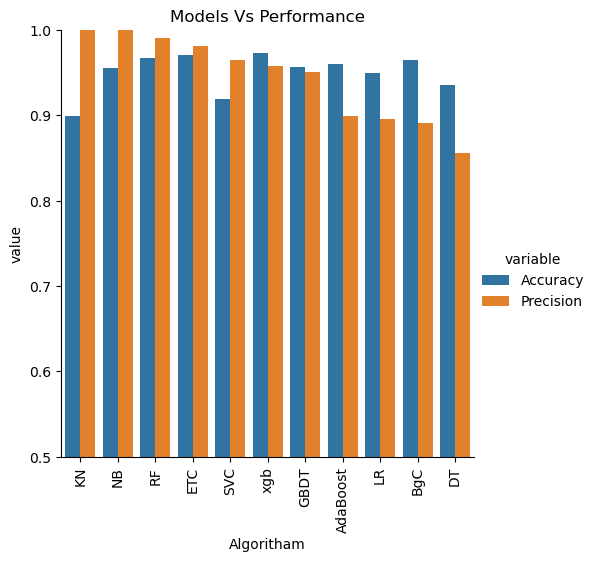

In [235]:
# lets plot our models performance and check

sns.catplot(data=df_performance1,
            x = 'Algoritham',
            y = 'value',
            hue = 'variable',
            kind = 'bar',
            height=5
           )


plt.title('Models Vs Performance')
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

# Model Improvement
### Lets apply the hyper paramter 'max_features' in TfidfVectorizer

In [288]:
# model improvement

tfidf = TfidfVectorizer(max_features=3000)
x_tfidf_max_3000 = tfidf.fit_transform(df['transformed_text']).toarray()
x_tfidf_max_3000.shape

(5169, 3000)

In [289]:
y_tfidf_max_3000 = df['target'].values
y_tfidf_max_3000.shape

(5169,)

In [290]:
X_train_tfidf_max_3000, x_test_tfidf_max_3000, y_train_tfidf_max_3000, y_test_tfidf_max_3000 = train_test_split(x_tfidf_max_3000, y_tfidf_max_3000, test_size=0.2, random_state=41)
X_train_tfidf_max_3000.shape, x_test_tfidf_max_3000.shape, y_train_tfidf_max_3000.shape, y_test_tfidf_max_3000.shape

((4135, 3000), (1034, 3000), (4135,), (1034,))

In [291]:
mnb.fit(X_train_tfidf_max_3000, y_train_tfidf_max_3000)
y_pred = mnb.predict(x_test_tfidf_max_3000)
print('MultinomialNB')
print('accuracy_score :', accuracy_score(y_test_tfidf_max_3000, y_pred))
print('confusion_matrix :', confusion_matrix(y_test_tfidf_max_3000, y_pred))
print('precision_score :',precision_score(y_test_tfidf_max_3000, y_pred))
print('-------------------------------------------------')

MultinomialNB
accuracy_score : 0.9700193423597679
confusion_matrix : [[897   1]
 [ 30 106]]
precision_score : 0.9906542056074766
-------------------------------------------------


In [245]:
# lets run all models 
accuracy_scores_max_3000 = []
precision_scores_max_3000 = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train_tfidf_max_3000, y_train_tfidf_max_3000, x_test_tfidf_max_3000, y_test_tfidf_max_3000)
    
    print("For ", name)
    print('accuracy - ', current_accuracy)
    print('Precison - ', current_precision)
    print('--------------------------------')
    
    accuracy_scores_max_3000.append(current_accuracy)
    precision_scores_max_3000.append(current_precision)

For  SVC
accuracy -  0.9323017408123792
Precison -  0.9714285714285714
--------------------------------
For  KN
accuracy -  0.9081237911025145
Precison -  1.0
--------------------------------
For  NB
accuracy -  0.9700193423597679
Precison -  0.9906542056074766
--------------------------------
For  DT
accuracy -  0.9342359767891683
Precison -  0.8469387755102041
--------------------------------
For  LR
accuracy -  0.9497098646034816
Precison -  0.8962264150943396
--------------------------------
For  RF
accuracy -  0.9729206963249516
Precison -  0.990909090909091
--------------------------------
For  AdaBoost
accuracy -  0.9632495164410058
Precison -  0.9016393442622951
--------------------------------
For  BgC
accuracy -  0.9613152804642167
Precison -  0.8582089552238806
--------------------------------
For  ETC
accuracy -  0.9748549323017408
Precison -  0.9296875
--------------------------------
For  GBDT
accuracy -  0.9584139264990329
Precison -  0.9603960396039604
-----------------

In [250]:
df_performance2 = pd.DataFrame({'Algoritham' : clfs.keys(), 'Accuracy' : accuracy_scores_max_3000, 'Precision' : precision_scores_max_3000}).sort_values('Precision', ascending=False)
df_performance2.rename(columns = {
    'Accuracy' : 'Accuracy_max_3000',
    'Precision' : 'Precision_max_3000'
}, inplace=True
                      )

In [267]:
# lets merge two dataframes and comapre results before and after max_features hyperparamater
df_performance_max_3000 = df_performance.merge(df_performance2, on='Algoritham')
df_performance_max_3000

,Algoritham,Accuracy,Precision,Accuracy_max_3000,Precision_max_3000
0,KN,0.899420,1.000000,0.908124,1.000000
1,NB,0.955513,1.000000,0.970019,0.990654
2,RF,0.967118,0.990385,0.972921,0.990909
3,ETC,0.970986,0.981818,0.974855,0.929688
4,SVC,0.918762,0.964286,0.932302,0.971429
5,xgb,0.972921,0.957627,0.974855,0.943548
6,GBDT,0.956480,0.950495,0.958414,0.960396
7,AdaBoost,0.960348,0.899160,0.963250,0.901639
8,LR,0.949710,0.896226,0.949710,0.896226
9,BgC,0.965184,0.890625,0.961315,0.858209


In [256]:
# we can apply MinMaxScaler, adding more input features, and voting classifier for model improvement

### MinMax Scaler for model improvement

In [263]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_tfidf_max_3000_scaler = scaler.fit_transform(x_tfidf_max_3000)
x_tfidf_max_3000_scaler

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [264]:
y_tfidf_max_3000_scaler = df['target'].values
y_tfidf_max_3000_scaler.shape

(5169,)

In [265]:
# splitting data for training and testing
X_train_tfidf_max_3000_scaler, x_test_tfidf_max_3000_scaler, y_train_tfidf_max_3000_scaler, y_test_tfidf_max_3000_scaler = train_test_split(x_tfidf_max_3000_scaler, y_tfidf_max_3000_scaler, test_size=0.2, random_state=41)
X_train_tfidf_max_3000_scaler.shape, x_test_tfidf_max_3000_scaler.shape, y_train_tfidf_max_3000_scaler.shape, y_test_tfidf_max_3000_scaler.shape

((4135, 3000), (1034, 3000), (4135,), (1034,))

In [266]:
# lets run all models 
accuracy_scores_max_3000_scaler = []
precision_scores_max_3000_scaler = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train_tfidf_max_3000_scaler, y_train_tfidf_max_3000_scaler, x_test_tfidf_max_3000_scaler, y_test_tfidf_max_3000_scaler)
    
    print("For ", name)
    print('accuracy - ', current_accuracy)
    print('Precison - ', current_precision)
    print('--------------------------------')
    
    accuracy_scores_max_3000_scaler.append(current_accuracy)
    precision_scores_max_3000_scaler.append(current_precision)

For  SVC
accuracy -  0.9632495164410058
Precison -  0.99
--------------------------------
For  KN
accuracy -  0.90715667311412
Precison -  1.0
--------------------------------
For  NB
accuracy -  0.97678916827853
Precison -  0.9375
--------------------------------
For  DT
accuracy -  0.9342359767891683
Precison -  0.8469387755102041
--------------------------------
For  LR
accuracy -  0.9545454545454546
Precison -  0.908256880733945
--------------------------------
For  RF
accuracy -  0.9729206963249516
Precison -  0.990909090909091
--------------------------------
For  AdaBoost
accuracy -  0.9632495164410058
Precison -  0.9016393442622951
--------------------------------
For  BgC
accuracy -  0.9613152804642167
Precison -  0.8582089552238806
--------------------------------
For  ETC
accuracy -  0.9748549323017408
Precison -  0.9296875
--------------------------------
For  GBDT
accuracy -  0.9584139264990329
Precison -  0.9603960396039604
--------------------------------
For  xgb
accura

In [268]:
df_performance3 = pd.DataFrame({'Algoritham' : clfs.keys(), 'Accuracy' : accuracy_scores_max_3000_scaler, 'Precision' : precision_scores_max_3000_scaler}).sort_values('Precision', ascending=False)
df_performance3.rename(columns = {
    'Accuracy' : 'Accuracy_max_3000_MinMaxScaler',
    'Precision' : 'Precision_max_3000_MinMaxScaler'
}, inplace=True
                      )

In [270]:
df_performance_max_3000_MinMax = df_performance_max_3000.merge(df_performance3, on='Algoritham')
df_performance_max_3000_MinMax

,Algoritham,Accuracy,Precision,Accuracy_max_3000,Precision_max_3000,Accuracy_max_3000_MinMaxScaler,Precision_max_3000_MinMaxScaler
0,KN,0.899420,1.000000,0.908124,1.000000,0.907157,1.000000
1,NB,0.955513,1.000000,0.970019,0.990654,0.976789,0.937500
2,RF,0.967118,0.990385,0.972921,0.990909,0.972921,0.990909
3,ETC,0.970986,0.981818,0.974855,0.929688,0.974855,0.929688
4,SVC,0.918762,0.964286,0.932302,0.971429,0.963250,0.990000
5,xgb,0.972921,0.957627,0.974855,0.943548,0.974855,0.943548
6,GBDT,0.956480,0.950495,0.958414,0.960396,0.958414,0.960396
7,AdaBoost,0.960348,0.899160,0.963250,0.901639,0.963250,0.901639
8,LR,0.949710,0.896226,0.949710,0.896226,0.954545,0.908257
9,BgC,0.965184,0.890625,0.961315,0.858209,0.961315,0.858209


### Adding More Input Features for model improvement

In [272]:
x_tfidf_max_3000.shape

(5169, 3000)

In [276]:
# adding more input features to our model for improvemnt in model performance

x_tfidf_max_3000_moreinput_features = np.hstack((x_tfidf_max_3000, df['num_characters'].values.reshape(-1,1)))
x_tfidf_max_3000_moreinput_features.shape

(5169, 3001)

In [278]:
y_tfidf_max_3000_moreinput_features = df['target'].values
y_tfidf_max_3000_moreinput_features.shape

(5169,)

In [279]:
# splitting data for training and testing

X_train_tfidf_max_3000_moreinput_features, x_test_tfidf_max_3000_moreinput_features, y_train_tfidf_max_3000_moreinput_features, y_test_tfidf_max_3000_moreinput_features = train_test_split(x_tfidf_max_3000_moreinput_features, y_tfidf_max_3000_moreinput_features, test_size=0.2, random_state=41)
X_train_tfidf_max_3000_moreinput_features.shape, x_test_tfidf_max_3000_moreinput_features.shape, y_train_tfidf_max_3000_moreinput_features.shape, y_test_tfidf_max_3000_moreinput_features.shape

((4135, 3001), (1034, 3001), (4135,), (1034,))

In [280]:
# lets run all models 
accuracy_scores_max_3000_moreinput_features = []
precision_scores_max_3000_moreinput_features = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train_tfidf_max_3000_moreinput_features, y_train_tfidf_max_3000_moreinput_features, x_test_tfidf_max_3000_moreinput_features, y_test_tfidf_max_3000_moreinput_features)
    
    print("For ", name)
    print('accuracy - ', current_accuracy)
    print('Precison - ', current_precision)
    print('--------------------------------')
    
    accuracy_scores_max_3000_moreinput_features.append(current_accuracy)
    precision_scores_max_3000_moreinput_features.append(current_precision)

For  SVC
accuracy -  0.8655705996131529
Precison -  0.0
--------------------------------
For  KN
accuracy -  0.9177949709864603
Precison -  0.6976744186046512
--------------------------------
For  NB
accuracy -  0.9313346228239845
Precison -  0.9850746268656716
--------------------------------
For  DT
accuracy -  0.9361702127659575
Precison -  0.8804347826086957
--------------------------------
For  LR
accuracy -  0.9584139264990329
Precison -  0.926605504587156
--------------------------------
For  RF
accuracy -  0.9700193423597679
Precison -  0.972972972972973
--------------------------------
For  AdaBoost
accuracy -  0.9690522243713733
Precison -  0.9193548387096774
--------------------------------
For  BgC
accuracy -  0.9555125725338491
Precison -  0.8571428571428571
--------------------------------
For  ETC
accuracy -  0.971953578336557
Precison -  0.928
--------------------------------
For  GBDT
accuracy -  0.9593810444874274
Precison -  0.9351851851851852
-----------------------

In [281]:
df_performance4 = pd.DataFrame({'Algoritham' : clfs.keys(), 'Accuracy' : accuracy_scores_max_3000_moreinput_features, 'Precision' : precision_scores_max_3000_moreinput_features}).sort_values('Precision', ascending=False)
df_performance4.rename(columns = {
    'Accuracy' : 'Accuracy_max_3000_moreinput_features',
    'Precision' : 'Precision_max_3000_moreinput_features'
}, inplace=True
                      )

In [282]:
df_performance_max_3000_MinMax_moreinput_features = df_performance_max_3000_MinMax.merge(df_performance4, on='Algoritham')
df_performance_max_3000_MinMax_moreinput_features

,Algoritham,Accuracy,Precision,Accuracy_max_3000,Precision_max_3000,Accuracy_max_3000_MinMaxScaler,Precision_max_3000_MinMaxScaler,Accuracy_max_3000_moreinput_features,Precision_max_3000_moreinput_features
0,KN,0.899420,1.000000,0.908124,1.000000,0.907157,1.000000,0.917795,0.697674
1,NB,0.955513,1.000000,0.970019,0.990654,0.976789,0.937500,0.931335,0.985075
2,RF,0.967118,0.990385,0.972921,0.990909,0.972921,0.990909,0.970019,0.972973
3,ETC,0.970986,0.981818,0.974855,0.929688,0.974855,0.929688,0.971954,0.928000
4,SVC,0.918762,0.964286,0.932302,0.971429,0.963250,0.990000,0.865571,0.000000
5,xgb,0.972921,0.957627,0.974855,0.943548,0.974855,0.943548,0.970019,0.933884
6,GBDT,0.956480,0.950495,0.958414,0.960396,0.958414,0.960396,0.959381,0.935185
7,AdaBoost,0.960348,0.899160,0.963250,0.901639,0.963250,0.901639,0.969052,0.919355
8,LR,0.949710,0.896226,0.949710,0.896226,0.954545,0.908257,0.958414,0.926606
9,BgC,0.965184,0.890625,0.961315,0.858209,0.961315,0.858209,0.955513,0.857143


### We can see there is no improvemnt after adding more input features to the model and MinMaxscaling the features, so at last we will try to use voting classifier and check the model performance

## Voting classifier 
- Lets apply voting classifier by taking best performing models till now
- models are NaiveBayes, Random Forest, SVC

In [284]:
# voting classifier

svc = SVC(kernel='sigmoid', gamma = 1.0, probability=True)
mnb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=50, random_state=41)

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('rf', rf)], voting='soft')
voting.fit(X_train_tfidf_max_3000, y_train_tfidf_max_3000)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=41))],
                 voting='soft')

In [287]:
# applying stacking

estimators=[('svm', svc), ('nb', mnb), ('rf', rf)]
final_estimator = RandomForestClassifier()

from sklearn.ensemble import StackingClassifier
stacking_clf = StackingClassifier(estimators= estimators, final_estimator=final_estimator)

stacking_clf.fit(X_train_tfidf_max_300, y_train_tfidf_max_3000)
y_pred = stacking_clf.predict(x_test_tfidf_max_3000)
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('Precision : ', precision_score(y_test, y_pred))

Accuracy :  0.9777562862669246
Precision :  0.9312977099236641


####  we can there is no improvemen in the model even after applying staking voting clasifier

### After trying all models we can finally decide that Multionomial Naive Bayes is performing better, so we will use that as our final model

## Pipeline for our model

In [292]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))